In [ ]:
!pip install tensorflow

## Q1. Theory and Concepts
### 1. Explain the cocept of batch normalization in the context of Artificial Neural Networks.

### Ans:
Batch Normalization (BN) is a technique used in artificial neural networks to improve the training speed and stability. It normalizes the activations of each layer to have a mean of zero and a variance of one. This is done by applying a normalization transformation to the input of each layer. BN helps in mitigating issues related to the internal covariate shift, which refers to the change in the distribution of layer inputs during training.

### 2. Describe the benefits of using batch normalization during training.
### Ans :
### Benefits of Batch Normalization

1. **Faster Training**: BN allows for higher learning rates because it reduces the risk of gradients becoming too large or too small, thereby stabilizing the training process.

2. **Improved Generalization**: By normalizing the activations, BN can act as a form of regularization, reducing the need for other forms of regularization like dropout.

3. **Reduced Initialization Sensitivity**: BN makes the network less sensitive to the choice of initial weights, allowing for more flexibility in initialization schemes.

4. **Convergence Speed**: The normalization of activations leads to faster convergence by reducing the problem of vanishing or exploding gradients.

### 3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.
### Ans :
### Working Principle of Batch Normalization

1. **Normalization Step**:
   - **Compute Mean and Variance**: For a given batch of data, BN computes the mean (\(\mu\)) and variance (\(\sigma^2\)) of the activations.
   - **Normalize**: Each activation \( x \) is then normalized using the computed mean and variance:
     \[
     \hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}
     \]
     where \(\epsilon\) is a small constant added for numerical stability.

2. **Learnable Parameters**:
   - **Scaling and Shifting**: After normalization, the activations are scaled and shifted using two learnable parameters, \(\gamma\) (scale) and \(\beta\) (shift):
     \[
     y = \gamma \hat{x} + \beta
     \]
     where \(\gamma\) and \(\beta\) are parameters learned during training. These parameters allow the network to learn the optimal scale and shift for each feature.

Batch normalization is applied independently to each feature and helps in maintaining the network's ability to learn complex functions by stabilizing the training dynamics. It is typically applied after the linear transformation (i.e., after the weights and biases are applied) and before the activation function.

## Implementation
#### Q4. Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it.
#### Ans:
For this implementation, we'll use the CIFAR-10 dataset.

### Q5. Implement a simple feedforward neural network using any deep learning framework/library (e.g., TensorFlow, PyTorch).

#### importing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

#### Load and preprocess the CIFAR-10 dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


#### Normalize the dataset

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#### Convert labels to one-hot encoding

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

####  Simple feedforward neural network without batch normalization

In [5]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Compile the model

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Train the model

In [7]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2604 - loss: 2.0297 - val_accuracy: 0.3491 - val_loss: 1.8058
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3729 - loss: 1.7592 - val_accuracy: 0.3852 - val_loss: 1.7393
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.4072 - loss: 1.6628 - val_accuracy: 0.4075 - val_loss: 1.6792
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4287 - loss: 1.6073 - val_accuracy: 0.4203 - val_loss: 1.6330
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.4364 - loss: 1.5708 - val_accuracy: 0.4259 - val_loss: 1.6194
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4473 - loss: 1.5413 - val_accuracy: 0.4365 - val_loss: 1.5926
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4588 - loss: 1.5197 - val_accuracy: 0.4378 - val_loss: 1.5873
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4663 - loss: 1.4907 - val_acc

#### Q4. Implement batch normalization layers in the neural network and train the model again.

In [8]:
from tensorflow.keras.layers import BatchNormalization

# Feedforward neural network with batch normalization
model_bn = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Compile the model
model_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with batch normalization
history_bn = model_bn.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3436 - loss: 1.8698 - val_accuracy: 0.3670 - val_loss: 1.7856
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4389 - loss: 1.5924 - val_accuracy: 0.3723 - val_loss: 1.8001
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.4725 - loss: 1.5039 - val_accuracy: 0.3582 - val_loss: 1.9651
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4847 - loss: 1.4600 - val_accuracy: 0.3975 - val_loss: 1.7798
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5026 - loss: 1.4122 - val_accuracy: 0.3344 - val_loss: 2.0571
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5140 - loss: 1.3842 - val_accuracy: 0.4436 - val_loss: 1.6197
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5153 - loss: 1.3737 - val_accuracy: 0.4546 - val_loss: 1.5505
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5267 - loss: 1.3319 - val_

#### Q5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.

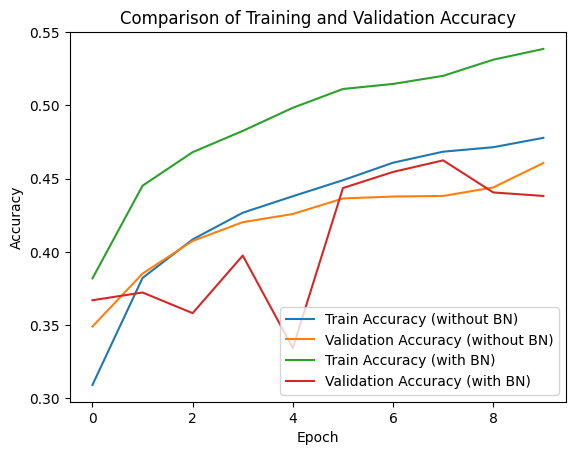

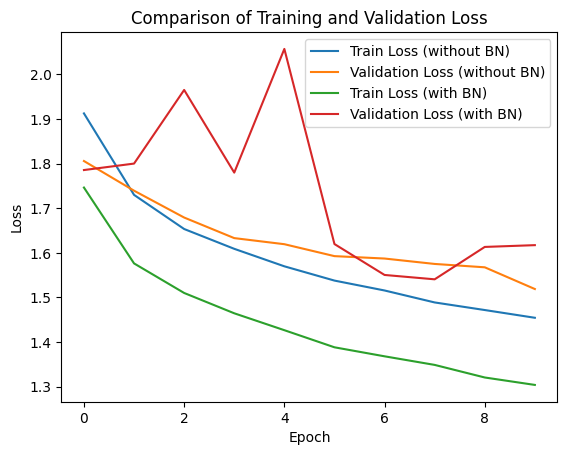

In [9]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy (without BN)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (without BN)')
plt.plot(history_bn.history['accuracy'], label='Train Accuracy (with BN)')
plt.plot(history_bn.history['val_accuracy'], label='Validation Accuracy (with BN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparison of Training and Validation Accuracy')
plt.show()

# Plot the loss
plt.plot(history.history['loss'], label='Train Loss (without BN)')
plt.plot(history.history['val_loss'], label='Validation Loss (without BN)')
plt.plot(history_bn.history['loss'], label='Train Loss (with BN)')
plt.plot(history_bn.history['val_loss'], label='Validation Loss (with BN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Comparison of Training and Validation Loss')
plt.show()


### Q6. Discuss the impact of batch normalization on the training process and the performance of the neural network.
### Ans:
Batch normalization (BN) significantly impacts neural network training and performance:

1. **Accelerated Training**: BN normalizes activations, which speeds up convergence and allows for higher learning rates.
2. **Reduced Sensitivity to Initialization**: It mitigates issues related to weight initialization, stabilizing the training process.
3. **Improved Generalization**: BN introduces a slight regularization effect, helping to prevent overfitting and improving generalization to new data.
4. **Stabilized Training**: By reducing internal covariate shift and maintaining consistent distributions, BN stabilizes gradient flow, addressing vanishing or exploding gradients.
5. **Adaptability to Batch Sizes**: While BN handles varying batch sizes, very small batches can lead to noisy statistics, potentially affecting performance.
6. **Potential Drawbacks**: BN adds computational overhead and complexity. It can also be less effective if batch sizes vary significantly between training and inference.



## Q3. Experimentation with Analysis
### 1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.


1. Import Libraries and Prepare Data

Assuming you've already loaded and preprocessed your data (e.g., CIFAR-10), here’s how you might set up the experiments.

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


2. Define Model Architecture

Define a function to create the model. This function can be reused with different batch sizes.

In [11]:
def create_model_with_bn():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


3. Train Models with Different Batch Sizes

Train the model with different batch sizes and observe the performance.

In [12]:
batch_sizes = [32, 64, 128]
histories = {}

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    model = create_model_with_bn()
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=batch_size, verbose=1)
    histories[batch_size] = history


Training with batch size: 32
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3301 - loss: 1.8968 - val_accuracy: 0.3128 - val_loss: 2.0106
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4179 - loss: 1.6436 - val_accuracy: 0.3622 - val_loss: 1.7926
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4382 - loss: 1.5805 - val_accuracy: 0.4124 - val_loss: 1.6722
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4571 - loss: 1.5267 - val_accuracy: 0.4183 - val_loss: 1.6387
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4673 - loss: 1.4905 - val_accuracy: 0.4170 - val_loss: 1.7079
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.4816 - loss: 1.4565 - val_accuracy: 0.4222 - val_loss: 1.6697
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.4926 - loss: 1.4370 - val_accuracy: 0.4484 - val_loss: 1.5927
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11

#### 4. Plot Results

Plot the training and validation accuracy and loss for each batch size to visualize the impact.

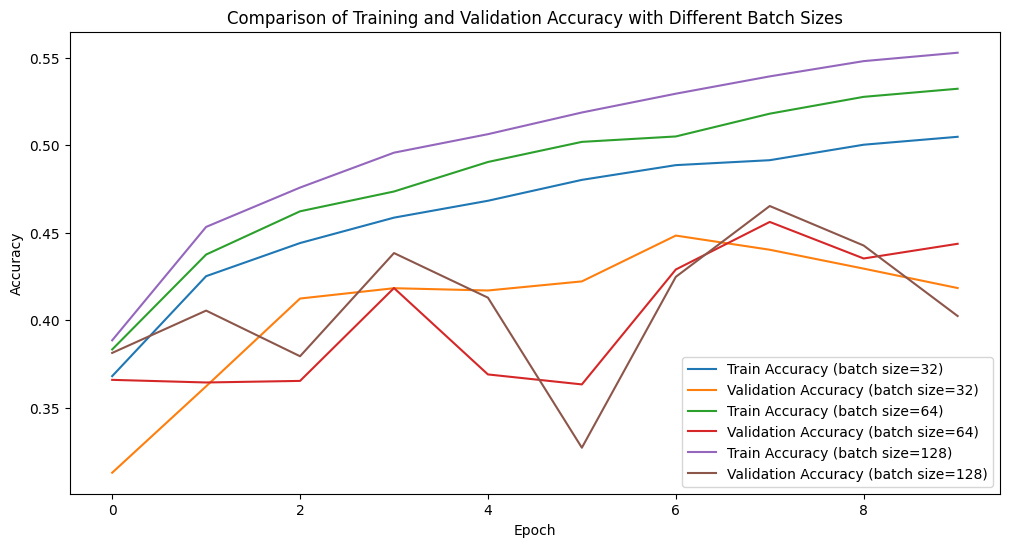

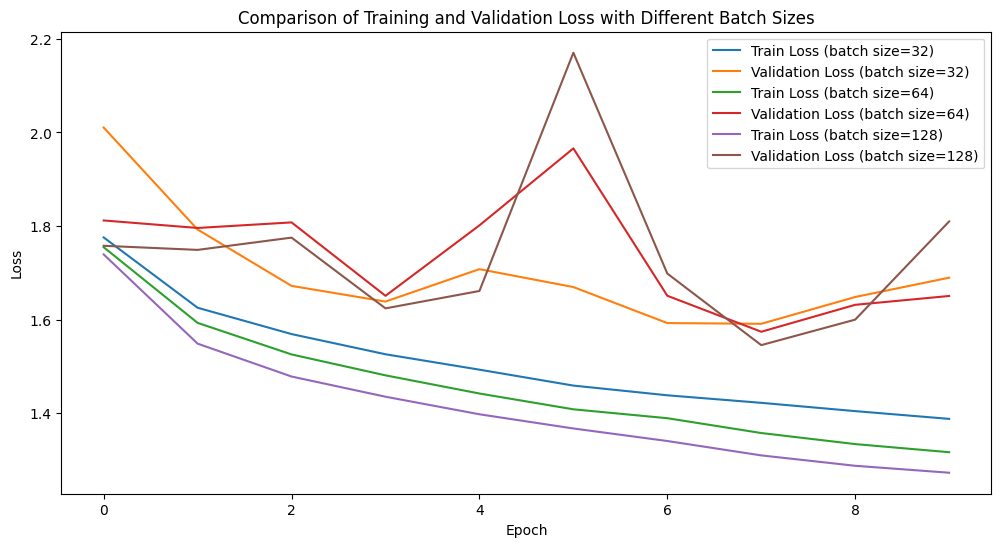

In [13]:
plt.figure(figsize=(12, 6))

for batch_size, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'Train Accuracy (batch size={batch_size})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (batch size={batch_size})')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparison of Training and Validation Accuracy with Different Batch Sizes')
plt.show()

plt.figure(figsize=(12, 6))

for batch_size, history in histories.items():
    plt.plot(history.history['loss'], label=f'Train Loss (batch size={batch_size})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss (batch size={batch_size})')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Comparison of Training and Validation Loss with Different Batch Sizes')
plt.show()


### 2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

### Ans:
#### Advantages of Batch Normalization

1. Faster Convergence: Batch normalization often leads to faster convergence during training, allowing you to use higher learning rates and reducing the number of epochs required.
2. Reduced Sensitivity to Initialization: It makes the network less sensitive to the initialization of weights, helping in cases where proper initialization is challenging.
3. Regularization Effect: It can add a regularizing effect to the model, potentially reducing overfitting and sometimes reducing the need for other forms of regularization like dropout.

#### Potential Limitations:
1. Computational Overhead: Batch normalization introduces additional computations and memory overhead, which might be a concern for very large networks or datasets.
2. Batch Size Dependence: The effectiveness of batch normalization can vary with the batch size. Very small batch sizes might lead to noisy estimates of the batch statistics, which can affect performance.
3. Complexity in Model Design: Adding batch normalization introduces additional parameters and layers to the network, increasing the complexity of the model architecture.

#### Examples of Limitations:

1. Small Datasets: In scenarios with very small datasets or small batch sizes, the estimates of mean and variance used for normalization can be noisy, potentially reducing the benefits of batch normalization.
2. Inference Performance: During inference, the batch statistics are replaced by moving averages, which may not always generalize well if the training batch size is very different from the inference batch size.
